In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import chess
from sarfa import core, OffenseDefenseBoardVisualization, SarfaBaseline, Engine, RemovalPerturber
from utils import get_all_pos
from IPython.display import Image, display
from collections import defaultdict

In [3]:
def offense_defense_saliency_algorithm(fen, action=None) -> tuple[dict[str, tuple[str, float]], chess.Move]:
    board = chess.Board(fen)

    saliency_results: dict[str, tuple[str, float]] = defaultdict(int)
    perturber = RemovalPerturber(board)
    saliency_calculator = SarfaBaseline(engine, board)
    optimal_move_original_board = action

    for perturbed_board, perturbed_position_str in perturber.process():
        saliency, dP, optimal_move = saliency_calculator.compute(perturbed_board, 
        action, allow_defense=True)

        if (optimal_move_original_board == None):
            optimal_move_original_board = chess.Move.from_uci(optimal_move)

        saliency_type = ""
        if dP < 0:
            saliency_type = "defensive"
            saliency = abs(saliency)
        else:
            saliency_type = "offensive"

        saliency_results[perturbed_position_str] = [saliency_type, saliency]

    return saliency_results, optimal_move_original_board


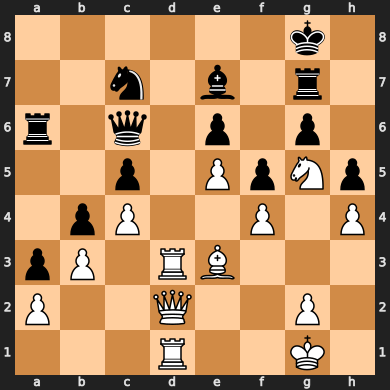

In [4]:
FEN = '6k1/2n1b1r1/r1q1p1p1/2p1PpNp/1pP2P1P/pP1RB3/P2Q2P1/3R2K1 w - - 0 1'
board = chess.Board(FEN)
engine = Engine("./stockfish_15_x64_avx2")
board_visualization = OffenseDefenseBoardVisualization(board)
board_visualization.only_board()

In [5]:
saliency_results, optimal_move_original_board = offense_defense_saliency_algorithm(FEN, action=None)

In [6]:
saliency_results

defaultdict(int,
            {'a2': ['offensive', 0.41327196076697614],
             'a3': ['offensive', 0.5232957306235393],
             'a6': ['offensive', 0.17080406329889528],
             'b3': ['offensive', 0.4150501074638024],
             'b4': ['offensive', 0.40617069931952665],
             'c4': ['offensive', 0.4418503862694502],
             'c5': ['defensive', 1.9712320484769326],
             'c6': ['offensive', 0.08134446855586956],
             'c7': ['offensive', 0.08013530049243794],
             'd1': ['offensive', 0.4148685453808343],
             'd2': ['offensive', 0.41539061316760933],
             'd3': ['offensive', 0.3965232977449826],
             'e3': ['offensive', 0.4201677276556779],
             'e5': ['offensive', 0.4120148003763774],
             'e6': ['offensive', 0.4588051898390085],
             'e7': ['offensive', 0.1044960917908091],
             'f4': ['offensive', 0.35698261064202735],
             'f5': ['defensive', 52.284659141979915],
    

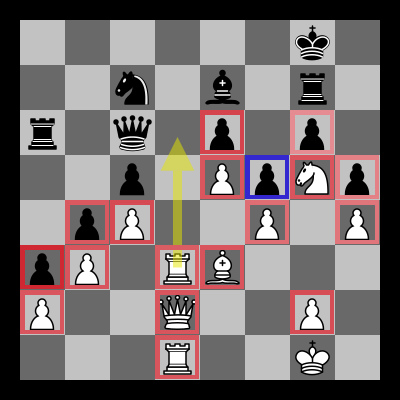

In [7]:
path = board_visualization.show_heatmap(saliency_results, optimal_move_original_board)
display(Image(path))